In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://www.hse.ru/ba/psy/ratings?from=414185556&course=2'

In [4]:
table1 = pd.read_html(url)[0]

In [5]:
table1.GPA.mean()

7.404347826086956

In [6]:
table1.iloc[:, 2].mean()

7.581863354037267

In [7]:
np.corrcoef(table1.GPA, table1.iloc[:, 2])

array([[1.        , 0.99457396],
       [0.99457396, 1.        ]])

In [8]:
url2 = 'https://www.hse.ru/ba/psy/ratings?from=414185556&course=3'
table2 = pd.read_html(url2)[0]

In [9]:
table2.GPA.mean()

7.506230769230768

In [10]:
table2.iloc[:, 2].mean()

7.699692307692308

In [11]:
np.corrcoef(table2.GPA, table2.iloc[:, 2])

array([[1.        , 0.99175502],
       [0.99175502, 1.        ]])

In [12]:
url3 = 'https://www.hse.ru/ba/psy/ratings?from=414185556&course=4'
table3 = pd.read_html(url3)[0]

In [13]:
table3.GPA.mean()

7.446952380952381

In [14]:
table3.iloc[:, 2].mean()

7.646571428571427

In [15]:
np.corrcoef(table3.GPA, table3.iloc[:, 2])

array([[1.        , 0.98692183],
       [0.98692183, 1.        ]])

<AxesSubplot:ylabel='Density'>

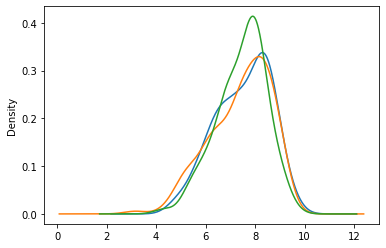

In [16]:
table2.GPA.plot(kind='density')
table1.GPA.plot(kind='density')
table3.GPA.plot(kind='density')

In [17]:
table2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Студент             130 non-null    object 
 1   Позиция в рейтинге  130 non-null    object 
 2   Средний балл        130 non-null    float64
 3   Минимальный балл    130 non-null    int64  
 4   Перцентиль          130 non-null    object 
 5   GPA                 130 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.2+ KB


In [18]:
df12 = pd.read_html('https://www.hse.ru/ba/psy/ratings?from=348116371&course=1')[0]

In [19]:
df34 = pd.read_html('https://www.hse.ru/ba/psy/ratings?from=381346749&course=1')[0]

In [20]:
print(df12.shape, df34.shape)

(185, 6) (171, 6)


In [21]:
dfme = pd.merge(df12, df34, on='Студент')

In [22]:
dfme.head()

,Студент,Позиция в рейтинге_x,Средний балл_x,Минимальный балл_x,Перцентиль_x,GPA_x,Позиция в рейтинге_y,Средний балл_y,Минимальный балл_y,Перцентиль_y,GPA_y
0,Карпухова Ольга Павловна,1,9.67,8,0%,9.65,19 - 21,9.1,8,10.53%,9.05
1,Субхангулов Александр Маратович,2,9.50,8,0.54%,9.40,3,9.4,8,1.17%,9.54
2,Протопова Мария Артуровна,3,9.33,9,1.08%,9.35,4,9.3,7,1.75%,9.32
3,Боронина Анастасия Александровна,4,9.33,8,1.62%,9.25,13 - 15,9.2,7,7.02%,9.12
4,Никулина Анастасия Александровна,5 - 6,9.17,7,2.16%,9.15,6,9.3,7,2.92%,9.27


In [23]:
dfme['ratio'] = dfme.GPA_y / dfme.GPA_x
dfme['diff'] = dfme.GPA_y - dfme.GPA_x

In [24]:
dfme[['Студент', 'GPA_x', 'GPA_y', 'ratio', 'diff']].sort_values('ratio', ascending=False).head(10)

,Студент,GPA_x,GPA_y,ratio,diff
158,Гутовский Илья Игоревич,5.25,7.78,1.481905,2.53
161,Белоусова Алена Игоревна,5.20,7.46,1.434615,2.26
153,Грунина Елена Андреевна,5.40,7.49,1.387037,2.09
139,Иванова Алина Павловна,6.00,8.20,1.366667,2.20
132,Бахтыгулова Камила,6.15,8.02,1.304065,1.87
116,Суркова Глафира Павловна,6.60,8.56,1.296970,1.96
121,Логунова Мария Сергеевна,6.50,8.27,1.272308,1.77
165,Жданова Юлия Артуровна,5.10,6.46,1.266667,1.36
152,Молчанова Вероника Александровна,5.45,6.88,1.262385,1.43
115,Рублева Екатерина Вячеславовна,6.60,8.24,1.248485,1.64


In [25]:
dfme[['Студент', 'GPA_x', 'GPA_y', 'ratio', 'diff']].sort_values('diff', ascending=False).head(10)

,Студент,GPA_x,GPA_y,ratio,diff
158,Гутовский Илья Игоревич,5.25,7.78,1.481905,2.53
161,Белоусова Алена Игоревна,5.20,7.46,1.434615,2.26
139,Иванова Алина Павловна,6.00,8.20,1.366667,2.20
153,Грунина Елена Андреевна,5.40,7.49,1.387037,2.09
116,Суркова Глафира Павловна,6.60,8.56,1.296970,1.96
132,Бахтыгулова Камила,6.15,8.02,1.304065,1.87
121,Логунова Мария Сергеевна,6.50,8.27,1.272308,1.77
87,Волкова Анастасия Игоревна,7.30,8.98,1.230137,1.68
115,Рублева Екатерина Вячеславовна,6.60,8.24,1.248485,1.64
106,Степанова Софья Александровна,6.85,8.41,1.227737,1.56


In [26]:
req_cols = ['Студент', 'GPA_x', 'GPA_y', 'ratio', 'diff']

In [27]:
dfme[['Студент', 'GPA_x', 'GPA_y', 'ratio', 'diff']].sort_values('ratio', ascending=False).tail(15)

,Студент,GPA_x,GPA_y,ratio,diff
145,Бодюл Дмитрий Валентинович,5.75,4.46,0.775652,-1.29
120,Козьминых Анна Ильинична,6.50,4.88,0.750769,-1.62
128,Костылева Анна Ивановна,6.30,4.54,0.720635,-1.76
147,Амгалан Уянга,5.60,3.90,0.696429,-1.70
100,Москаленко Максим Алексеевич,7.00,4.80,0.685714,-2.20
127,Жиганшин Камиль Русланович,6.35,4.17,0.656693,-2.18
112,Пешакова Екатерина Дмитриевна,6.70,4.18,0.623881,-2.52
95,Вахер Екатерина,7.15,4.10,0.573427,-3.05
167,Личагина Полина Антоновна,4.85,2.56,0.527835,-2.29
114,Брусиловская Дарья Данииловна,6.60,3.28,0.496970,-3.32


In [28]:
dfme[dfme["Студент"].str.contains('Шир|Ерм')][req_cols]

,Студент,GPA_x,GPA_y,ratio,diff
9,Ермаков Павел Алексеевич,8.95,8.46,0.945251,-0.49
49,Ширяева Дарья Сергеевна,8.05,8.54,1.060870,0.49


In [29]:
df_gpa = dfme.sort_values('ratio', ascending=False)[['Студент', 'GPA_x', 'GPA_y']]

In [30]:
dfpl = pd.wide_to_long(df_gpa, 'GPA', i='Студент', j='half', suffix='\\w+').reset_index()

In [31]:
dfpl.head()

,Студент,half,GPA
0,Гутовский Илья Игоревич,_x,5.25
1,Белоусова Алена Игоревна,_x,5.20
2,Грунина Елена Андреевна,_x,5.40
3,Иванова Алина Павловна,_x,6.00
4,Бахтыгулова Камила,_x,6.15


<AxesSubplot:>

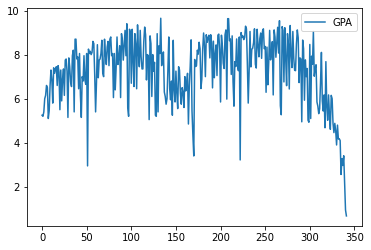

In [32]:
dfpl.plot()

In [34]:
# sns.lineplot(dfpl, x = 'half', y='GPA')